In [ ]:
!pip install tensorflow

In [ ]:
!pip install Pillow

In [ ]:
breeds = ["beagle", "bernese_mountain_dog", "doberman", "labrador_retriever", "siberian_husky"]

In [ ]:
import tensorflow as tf

In [ ]:
args = {
    "labels": "inferred",
    "label_mode": "categorical",
    "batch_size": 32,
    "image_size": (256, 256),
    "seed": 1,
    "validation_split": .2,
    "class_names": breeds
}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/My Drive/images",
    subset="training",
    **args
)

Found 764 files belonging to 5 classes.
Using 612 files for training.


In [ ]:
test = tf.keras.utils.image_dataset_from_directory(
  "/content/drive/My Drive/images",
  subset="validation",
    **args
)

Found 764 files belonging to 5 classes.
Using 152 files for validation.


In [ ]:
first = train.take(1)
first

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

In [ ]:
images, labels = list(first)[0]
first_image = images[0]

In [ ]:
first_image[:3,:3,0]

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[169.60547, 169.84036, 165.73567],
       [165.69727, 167.42969, 168.54556],
       [174.16211, 172.57031, 172.     ]], dtype=float32)>

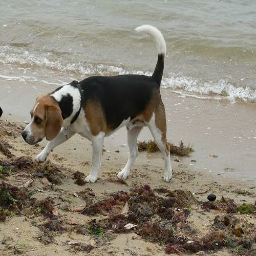

In [ ]:
from PIL import Image

Image.fromarray(images[0].numpy().astype("uint8"))

In [ ]:
print(labels[0])

tf.Tensor([1. 0. 0. 0. 0.], shape=(5,), dtype=float32)


In [ ]:
train = train.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test = test.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

model = Sequential([
  tf.keras.layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(256,256,3)),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(len(breeds))
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train,
    validation_data=test,
    epochs=15,
    verbose=1
)

Epoch 1/15
20/20 [==============================] - 97s 5s/step - loss: 42.4597 - accuracy: 0.2614 - val_loss: 2.8997 - val_accuracy: 0.2697
Epoch 2/15
20/20 [==============================] - 72s 4s/step - loss: 2.6975 - accuracy: 0.3938 - val_loss: 1.8204 - val_accuracy: 0.3289
Epoch 3/15
20/20 [==============================] - 86s 4s/step - loss: 1.1599 - accuracy: 0.5637 - val_loss: 1.6871 - val_accuracy: 0.3684
Epoch 4/15
20/20 [==============================] - 72s 4s/step - loss: 0.7776 - accuracy: 0.7304 - val_loss: 1.7961 - val_accuracy: 0.3816
Epoch 5/15
20/20 [==============================] - 73s 4s/step - loss: 0.5229 - accuracy: 0.8840 - val_loss: 1.7475 - val_accuracy: 0.3816
Epoch 6/15
20/20 [==============================] - 72s 4s/step - loss: 0.3286 - accuracy: 0.9412 - val_loss: 2.7334 - val_accuracy: 0.2895
Epoch 7/15
20/20 [==============================] - 72s 4s/step - loss: 0.2756 - accuracy: 0.9575 - val_loss: 3.0394 - val_accuracy: 0.3158
Epoch 8/15
20/20 [=

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 flatten (Flatten)           (None, 1048576)           0         
                                                                 
 dense (Dense)               (None, 128)               134217856 
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                                 
Total params: 134218949 (512.00 MB)
Trainable params: 134218949 (512.00 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<Axes: >

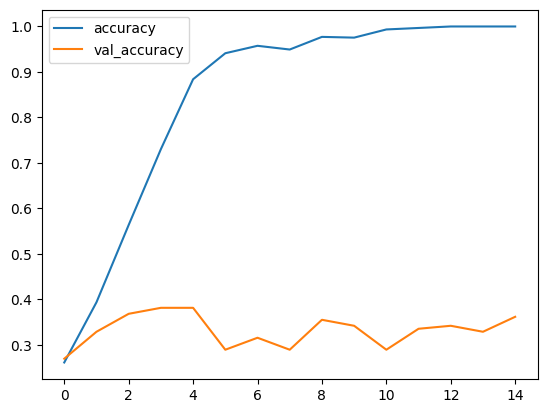

In [ ]:
import pandas as pd

history_df = pd.DataFrame.from_dict(history.history)
history_df[["accuracy", "val_accuracy"]].plot()

In [ ]:
def train_model(network, epochs=30):
    model = Sequential(network)

    model.compile(optimizer='adam',
                  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    history = model.fit(
      train,
      validation_data=test,
      epochs=epochs
    )
    history_df = pd.DataFrame.from_dict(history.history)
    return history_df, model

In [ ]:
network = [
  tf.keras.layers.Rescaling(1./255),
  layers.Conv2D(16, 4, padding='same', activation='relu', input_shape=(256,256,3)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 4, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 4, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(len(breeds))
]

history_df, model = train_model(network)

Epoch 1/30
20/20 [==============================] - 80s 4s/step - loss: 1.9948 - accuracy: 0.2794 - val_loss: 1.5741 - val_accuracy: 0.2566
Epoch 2/30
20/20 [==============================] - 70s 4s/step - loss: 1.5190 - accuracy: 0.3072 - val_loss: 1.5712 - val_accuracy: 0.2237
Epoch 3/30
20/20 [==============================] - 65s 3s/step - loss: 1.3891 - accuracy: 0.4199 - val_loss: 1.5032 - val_accuracy: 0.3684
Epoch 4/30
20/20 [==============================] - 65s 3s/step - loss: 1.2117 - accuracy: 0.4886 - val_loss: 1.4673 - val_accuracy: 0.3421
Epoch 5/30
20/20 [==============================] - 64s 3s/step - loss: 0.9172 - accuracy: 0.6389 - val_loss: 1.6119 - val_accuracy: 0.3553
Epoch 6/30
20/20 [==============================] - 65s 3s/step - loss: 0.6297 - accuracy: 0.7680 - val_loss: 2.0148 - val_accuracy: 0.3487
Epoch 7/30
20/20 [==============================] - 71s 4s/step - loss: 0.3329 - accuracy: 0.8758 - val_loss: 3.0680 - val_accuracy: 0.2961
Epoch 8/30
20/20 [==

<Axes: >

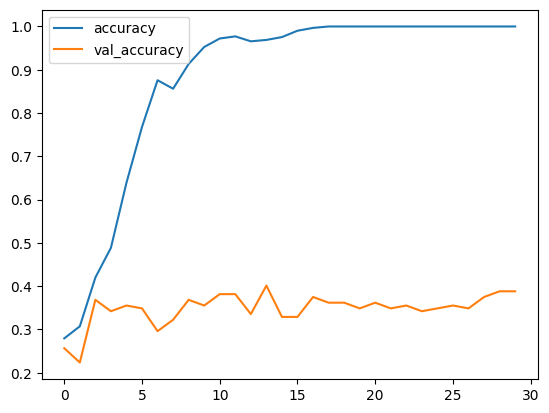

In [ ]:
history_df[["accuracy", "val_accuracy"]].plot()

In [ ]:
data_augmentation = tf.keras.Sequential(
  [
    layers.RandomFlip("horizontal", seed=1),
      layers.RandomRotation(0.2, seed=1),
    layers.RandomZoom(0.2, seed=1),
  ]
)


full_network = [
    data_augmentation
] + network

history_df, model = train_model(full_network, epochs=3)

Epoch 1/3
20/20 [==============================] - 73s 4s/step - loss: 2.0977 - accuracy: 0.3758 - val_loss: 1.5253 - val_accuracy: 0.3487
Epoch 2/3
20/20 [==============================] - 71s 4s/step - loss: 1.4810 - accuracy: 0.3627 - val_loss: 1.4935 - val_accuracy: 0.3421
Epoch 3/3
20/20 [==============================] - 71s 4s/step - loss: 1.4461 - accuracy: 0.3922 - val_loss: 1.4913 - val_accuracy: 0.3553


<Axes: >

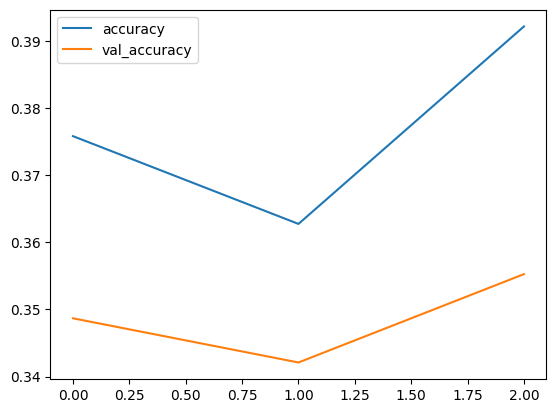

In [ ]:
history_df[["accuracy", "val_accuracy"]].plot()

In [ ]:
preds = model.predict(test)

5/5 [==============================] - 4s 720ms/step


In [ ]:
import numpy as np
predicted_class = np.argmax(preds, axis=1)

In [ ]:
actual_labels = np.concatenate([y for x, y in test], axis=0)

In [ ]:
pip install scikit-learn

In [ ]:
predictions = model.predict(test)
print("Shape of predictions:", predictions.shape)
print("Sample predictions:", predictions[0])



5/5 [==============================] - 6s 1s/step
Shape of predictions: (152, 5)
Sample predictions: [ 0.5570337   0.9226725   0.41369024 -0.16296357 -0.56112784]


In [ ]:
actual_labels = np.concatenate([y for x, y in test], axis=0)
predicted_class = np.argmax(model.predict(test), axis=1)

print("Length of actual_labels:", len(actual_labels))
print("Length of predicted_class:", len(predicted_class))


5/5 [==============================] - 7s 1s/step
Length of actual_labels: 152
Length of predicted_class: 152


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

actual_labels_categorical = np.argmax(actual_labels, axis=1)


actual_labels_categorical = actual_labels_categorical.flatten()
predicted_class = predicted_class.flatten()

print("Length of actual_labels_categorical:", len(actual_labels_categorical))
print("Length of predicted_class:", len(predicted_class))

conf_matrix = confusion_matrix(actual_labels_categorical, predicted_class)

accuracy = accuracy_score(actual_labels_categorical, predicted_class)
precision = precision_score(actual_labels_categorical, predicted_class, average='weighted')
recall = recall_score(actual_labels_categorical, predicted_class, average='weighted')
f1 = f1_score(actual_labels_categorical, predicted_class, average='weighted')

print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



Length of actual_labels_categorical: 152
Length of predicted_class: 152
Confusion Matrix:
[[22  9  2  1  0]
 [18 26  1  0  0]
 [12  9  5  1  0]
 [22  6  2  1  0]
 [ 9  5  0  1  0]]

Accuracy: 0.35526315789473684
Precision: 0.3390445754309102
Recall: 0.35526315789473684
F1 Score: 0.297730596414807


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
history_df, model = train_model(full_network, epochs=50)

predicted_class = np.argmax(model.predict(test), axis=1)
conf_matrix = confusion_matrix(actual_labels_categorical, predicted_class)
accuracy = accuracy_score(actual_labels_categorical, predicted_class)
precision = precision_score(actual_labels_categorical, predicted_class, average='weighted')
recall = recall_score(actual_labels_categorical, predicted_class, average='weighted')
f1 = f1_score(actual_labels_categorical, predicted_class, average='weighted')

print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Epoch 1/50
20/20 [==============================] - 72s 4s/step - loss: 1.4103 - accuracy: 0.4134 - val_loss: 1.4490 - val_accuracy: 0.3553
Epoch 2/50
20/20 [==============================] - 72s 4s/step - loss: 1.3654 - accuracy: 0.4395 - val_loss: 1.3975 - val_accuracy: 0.4013
Epoch 3/50
20/20 [==============================] - 72s 4s/step - loss: 1.3209 - accuracy: 0.4526 - val_loss: 1.4063 - val_accuracy: 0.3947
Epoch 4/50
20/20 [==============================] - 72s 4s/step - loss: 1.2817 - accuracy: 0.4624 - val_loss: 1.4160 - val_accuracy: 0.4342
Epoch 5/50
20/20 [==============================] - 79s 4s/step - loss: 1.2509 - accuracy: 0.4673 - val_loss: 1.3586 - val_accuracy: 0.4671
Epoch 6/50
20/20 [==============================] - 71s 4s/step - loss: 1.2237 - accuracy: 0.5261 - val_loss: 1.3102 - val_accuracy: 0.4474
Epoch 7/50
20/20 [==============================] - 70s 4s/step - loss: 1.1687 - accuracy: 0.5310 - val_loss: 1.3125 - val_accuracy: 0.4276
Epoch 8/50
20/20 [==